In [2]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [1]:
import pandas as pd
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
with open("data_cleaned/day_routes",'rb') as file:
    dataDayRoutes=pickle.load(file)
with open("data_cleaned/routes", 'rb') as file:
    dataRoutes = pickle.load(file)
with open("data_cleaned/stops", 'rb') as file:
    dataStops = pickle.load(file)
with open("data_cleaned/trips", 'rb') as file:
    dataTrips = pickle.load(file)

with open("data_cleaned/stop_times", 'rb') as file:
    dataStopTimes = pickle.load(file)
with open("data_cleaned/stop_times2", 'rb') as file:
    dataStopTimes2 = pickle.load(file)
with open("data_cleaned/dataStopsExtra", 'rb') as file:
    dataStopsExtra = pickle.load(file)
#dataRoutes=dataRoutes[dataRoutes['route_type']!=702]
print(dataStopsExtra)

      stop_id                   stop_name  types         tip  size   stop_lat  \
0           1     Kalemegdan (Donji Grad)      1  tramvajska   220  44.826810   
1           2            Tadeuša Košćuška      1  tramvajska   218  44.825917   
2           3            Tadeuša Košćuška      1  tramvajska   220  44.826253   
3           4                  Kalemegdan      1  tramvajska   152  44.820329   
4           5                  Kalemegdan      1  tramvajska   151  44.820884   
...       ...                         ...    ...         ...   ...        ...   
3111     7941                   Simić - R      1   autobuska    20  44.626497   
3112     7942                   Simić - R      1   autobuska    20  44.626713   
3113     7968  Stara Lipovica - Okretnica      1   autobuska    20  44.613962   
3114     7969                    Manastir      1   autobuska    20  44.616600   
3115     7970                    Manastir      1   autobuska    20  44.616217   

       stop_lon  zone_id  


In [2]:
data=dataStopTimes2.merge(dataTrips)

data=data[['stop_id','stop_sequence','route_id','direction_id']]
data1=data[data['direction_id']==0]
data2=data[data['direction_id']==1]

data1=data1.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data1=data1.sort_values(by=['route_id','stop_sequence'])
data2=data2.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data2=data2.sort_values(by=['route_id','stop_sequence'])
dataStopSequences=pd.concat([data1, data2], sort=False)
dataDayRoutesMerge=dataDayRoutes['route_id']
dataStopSequences= dataStopSequences.merge(dataDayRoutesMerge)
print(dataStopSequences)

   # print(min0,min1,max0,max1)
   # print(data1.iloc[max0],data2.iloc[max1])
    #dataStopSequences=dataStopSequences.loc[dataStopSequences['Fee'].idxmax()]

      stop_id  stop_sequence  route_id  direction_id
0           7              1         2             0
1           5              2         2             0
2          71              3         2             0
3          73              4         2             0
4          52              5         2             0
...       ...            ...       ...           ...
8116      194             12     40102             1
8117     3032             13     40102             1
8118     3141             14     40102             1
8119     2111             15     40102             1
8120      952             16     40102             1

[8121 rows x 4 columns]


In [3]:
G = nx.DiGraph()
data=dataStopsExtra[['stop_id','stop_name','stop_lat','stop_lon','zone_id','tip','size']]
#print(data)
#print(dataStops.groupby(['stop_id','stop_name']).
for i in range(0,data.shape[0]):
    if (data.iloc[i]['stop_id'] in dataStopSequences['stop_id'].values):
        G.add_node(data.iloc[i]['stop_id'],name=data.iloc[i]['stop_name'],lat=data.iloc[i]['stop_lat'],lon=data.iloc[i]['stop_lon'],zone=data.iloc[i]['zone_id'],tip=data.iloc[i]['tip'],departures=data.iloc[i]['size'])


#data=dataStopTimes2.merge(dataTrips)

#data=data[['stop_id','stop_sequence','route_id']]



for i in range(1,dataStopSequences.shape[0]):
    if (dataStopSequences.iloc[i]['stop_sequence']>dataStopSequences.iloc[i-1]['stop_sequence']):
        if((dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id']) in G.edges):
            G.edges[dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id']]['weight']+=1
        else:
            G.add_edge(dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id'],weight=1)
print(G)

DiGraph with 3116 nodes and 3733 edges


In [12]:
print(nx.density(G))
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(diameter)
#print(nx.diameter(G))
print(nx.average_shortest_path_length(G))

0.0003845939870229149
156
31.761033304005423


In [4]:
cnt1=0
cnt2=0
for i in range(0,dataRoutes.shape[0]):
    mask0=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==0)
    mask1=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==1)
    data1=dataStopSequences[mask0]
   
   
    min0=data1.query('stop_sequence == stop_sequence.min()')['stop_id']
    min0=min0.to_string(index=False)
    max0=data1.query('stop_sequence == stop_sequence.max()')['stop_id']
    max0=max0.to_string(index=False)
   
   # print(data1.shape,max0)
    data2=dataStopSequences[mask1]
    
    min1=data2.query('stop_sequence == stop_sequence.min()')['stop_id']
    min1=min1.to_string(index=False)
    max1=data2.query('stop_sequence == stop_sequence.max()')['stop_id']
    max1=max1.to_string(index=False)

   # print(min0,min1,max0,max1)

    if (min0.isnumeric() and max1.isnumeric()and (int(min0)!=int(max1))):
        cnt1=cnt1+1
        # print('x')
        G.add_edge(int(max1),int(min0),weight=1)
    if (min1.isnumeric() and max0.isnumeric() and (int(min1)!=int(max0))):
        cnt2=cnt2+1
        #print('y')
        G.add_edge(int(max0),int(min1),weight=1)
#print(G.nodes)
#print(cnt1,cnt2)
print(G)

DiGraph with 3116 nodes and 3836 edges


In [14]:
print(nx.density(G))
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
s= set(G.nodes)
print('najkraci')
#print(nx.shortest_path(G,source=2142,target=2618))
#for i in s:
 #   for j in s:
  #      novo=nx.shortest_path_length(G,source=i,target=j)
   #     if(novo>maxx):
    #        maxx=novo
     #       print(novo,i,j)
#diameter_nodes = nx.shortest_path(G, source = n1, target = n2)
#print(len(diameter_nodes))
print(diameter)
print(nx.average_shortest_path_length(G))
#nx.draw_networkx(G)

0.00039520560788103444
najkraci
156
39.09636381993625


In [20]:
print(nx.number_weakly_connected_components(G))
print(nx.number_strongly_connected_components(G))
#print(nx.edge_connectivity(G))
#G2=G.to_undirected()
#print(nx.sigma(G2, niter=10, nrand=5, seed=None))
#print(nx.core_number(G))
#ne postoji gigantska komponenta
#nije izrazen mali svet


1
1


0
{0: 1.0, 1: 1.0, 2: 1.4215384615384616, 3: 1.9281045751633987, 4: 3.4285714285714284, 5: 5.3999999999999995, 6: 2.9999999999999996, 7: 0.5}


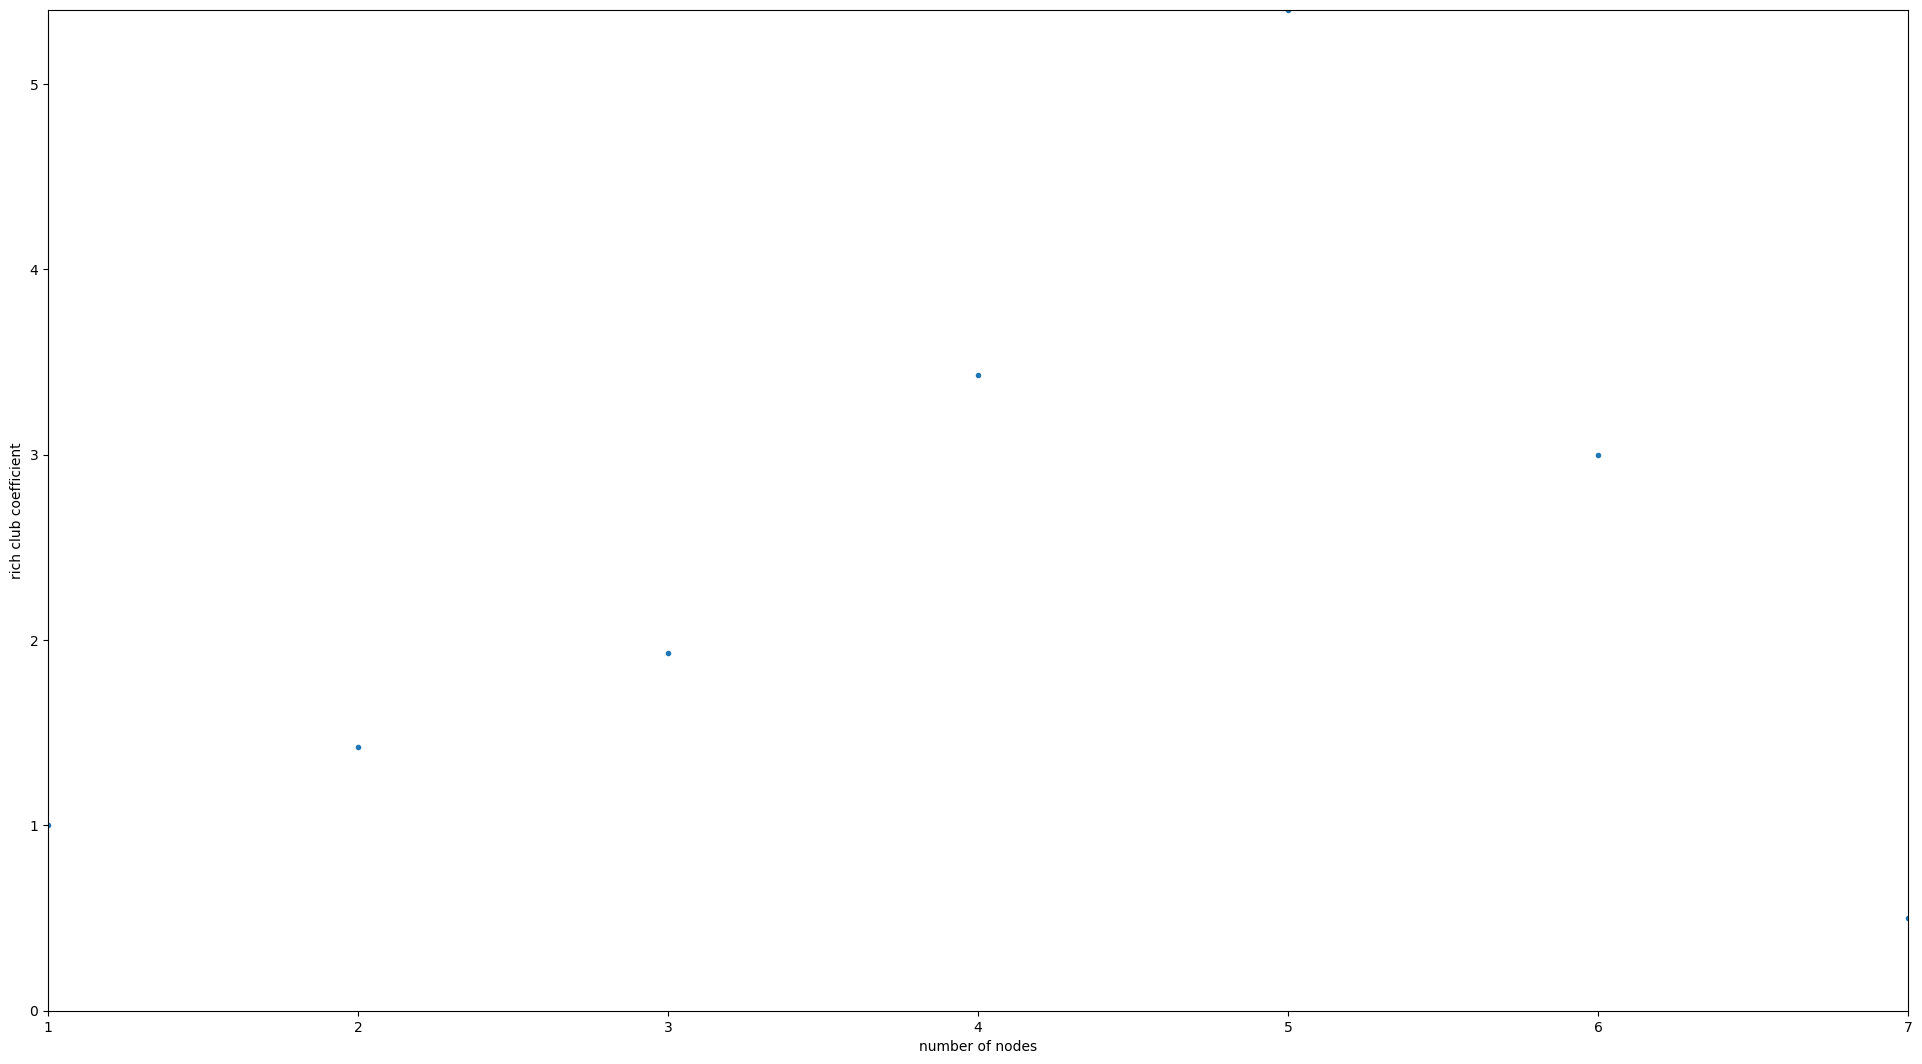

In [24]:
print(nx.number_of_selfloops(G))
rich=nx.rich_club_coefficient(G.to_undirected(),  Q=100, seed=None)
print(rich)

x, y = zip(*rich.items())                                                      

plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

In [18]:
pd.set_option('display.max_rows', None)
#KLASTERIZACIJA
n = G.number_of_nodes()
m = G.number_of_edges()
Gnm = nx.gnm_random_graph(n, m) 
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

print('lModel')
id_stanice, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G,weight = "weight")
#rint(sum(clustering_coef)/len(clustering_coef))
print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

print('GNMModel')
id_stanice, clustering_coef = zip(*nx.clustering(Gnm, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(Gnm)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print('ERModel')
id_stanice, clustering_coef = zip(*nx.clustering(er_mreza, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(er_mreza)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)



0.0007904112157620689
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 21, što je odstupanje od 0.5474452554744526%
lModel
0.0011360175898471486
Max lokalni cc: 0.1799887214135533
Prosečan cc: 0.0011360175898471486
Lokalni stepeni klasterisanja koji nisu nula:
       id        cc
76   1049  0.002025
9     258  0.002143
10    259  0.002700
6     220  0.003000
57    722  0.003090
1     147  0.003538
41    494  0.003538
121  3109  0.003780
49    551  0.003780
77   1093  0.004071
0      64  0.004326
2     187  0.004326
50    553  0.004326
62    790  0.004500
3     188  0.004953
12    274  0.004953
47    535  0.005669
40    480  0.005738
118  2914  0.005952
56    705  0.005952
110  2202  0.005952
107  1653  0.006000
19    346  0.006107
22    401  0.006240
39    454  0.006240
108  2124  0.006434
71    910  0.007143
58    723  0.007429
96   1214  0.007500
61    789  0.007500
60    788  0.007500
95   1213  0.007500
114  2498  0.008177
70    906  0.008608
69    875  0.008608
9

0
{0: 1.0, 1: 1.0, 2: 1.4574132492113565, 3: 1.9536423841059603, 4: 2.909090909090909, 5: 1.9285714285714284, 6: 1.4999999999999998, 7: 1.0}


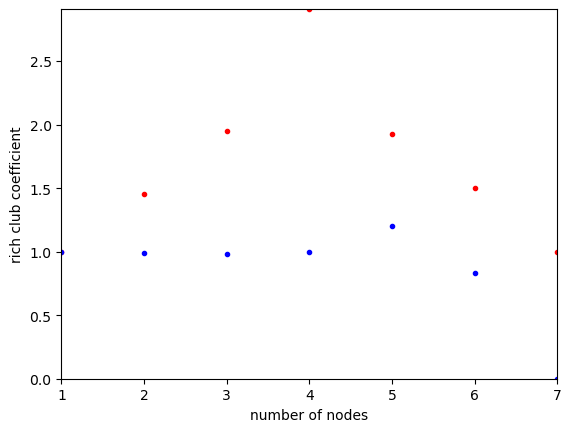

In [29]:
print(nx.number_of_selfloops(G))
rich=nx.rich_club_coefficient(G.to_undirected(),  Q=100, seed=None)
rich2=nx.rich_club_coefficient(er_mreza,Q=100,seed=None)
print(rich)

x, y = zip(*rich.items())                                                      
x1,y1=zip(*rich2.items())
plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.',color='r')    
plt.scatter(x1, y1, marker='.',color='b')    
#plt(scatter,)
plt.show()

In [31]:
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.2922153360695084
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.5626947234301568


In [45]:
dict_degree = {}
for node in G.nodes():
    
    w = G.degree(nbunch= node)
    G.neighbors(node)
    for neigh_node in G.neighbors(node):
        if w in dict_degree:
            dict_degree[w].append(G.degree(neigh_node))
        else:
            dict_degree[w] = [G.degree(neigh_node)]

In [46]:
d = []
for k in dict_degree:
    m = np.array(dict_degree[k]).mean()
    s = np.array(dict_degree[k]).std()
    d.append([k, m, s])
d = np.array(d)

index = np.argsort(d[:, 0])
d[:, 0] = d[index, 0]
d[:, 1] = d[index, 1]
d[:, 2] = d[index, 2]

Text(0.5, 1.0, 'LModel')

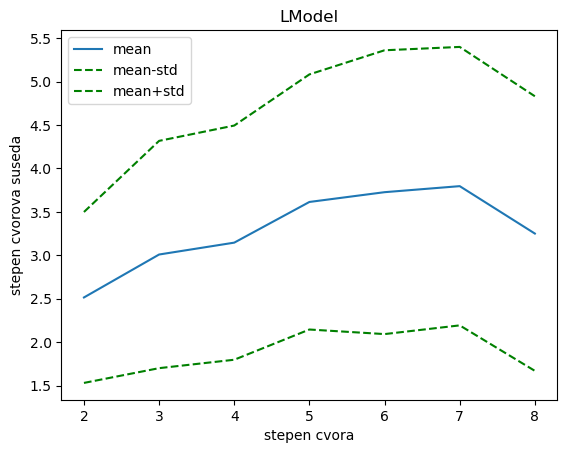

In [48]:
plt.plot(d[:, 0], d[:, 1], label='mean')
plt.plot(d[:, 0], d[:, 1] - d[:, 2], linestyle='--', color='g', label = 'mean-std')
plt.plot(d[:, 0], d[:, 1] + d[:, 2], linestyle='--', color = 'g', label='mean+std')
plt.legend()
plt.xlabel('stepen cvora')
plt.ylabel('stepen cvorova suseda')
plt.title('LModel')

In [64]:
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({2: 2237, 3: 543, 4: 198, 5: 80, 6: 36, 7: 15, 8: 7})


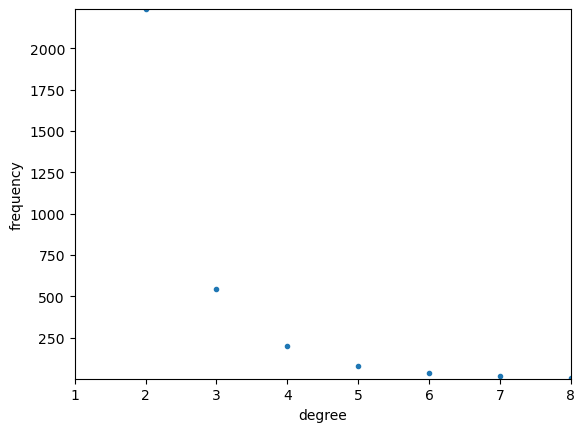

In [67]:
from collections import Counter
from operator import itemgetter
plot_deg_frequency(G,xscale='linear', yscale='linear')



Counter({2: 1350, 4: 675, 6: 374, 8: 247, 12: 109, 10: 98, 14: 75, 16: 56, 3: 27, 18: 21, 20: 18, 5: 16, 22: 12, 26: 8, 24: 7, 7: 6, 32: 4, 11: 4, 9: 3, 30: 2, 25: 1, 19: 1, 17: 1, 13: 1})


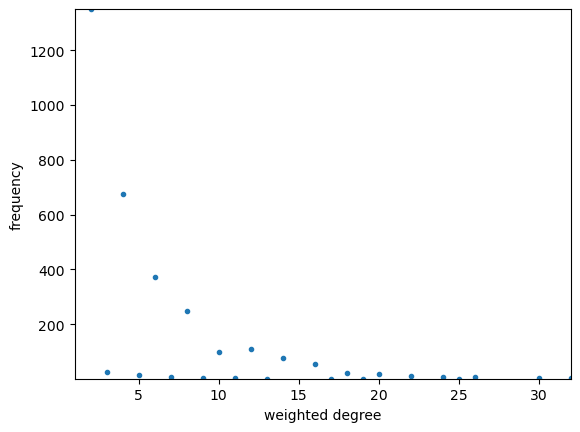

In [34]:
plot_deg_frequency(G,weighted=True,xscale='linear',yscale='linear')

In [58]:
data=calculate_centralities(G)

print(data)
    
#print(dataStops)
#print(calculate_centralities(G))
#print(sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True))
#print(sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True))
#print(sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True))
#print(sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True))


      stop_id                   stop_name       IDC       ODC        CC  \
0           1     Kalemegdan (Donji Grad)  0.000321  0.000321  0.033457   
1           2            Tadeuša Košćuška  0.000321  0.000642  0.032376   
2           3            Tadeuša Košćuška  0.000642  0.000321  0.034613   
3           4                  Kalemegdan  0.000642  0.000321  0.033765   
4           5                  Kalemegdan  0.000321  0.000642  0.034097   
5           6                 Pristanište  0.000642  0.000642  0.034863   
6           7                 Pristanište  0.000642  0.000642  0.035299   
7           8                Brankov Most  0.000321  0.000642  0.033693   
8           9                Brankov Most  0.000321  0.000321  0.036073   
9          10          Ekonomski Fakultet  0.000642  0.000642  0.039467   
...       ...                         ...       ...       ...       ...   
3106     7809               Kuzmanovići R  0.000321  0.000321  0.014416   
3107     7877           P

In [57]:
def calculate_centralities(G):
  
    IDC_dict = nx.in_degree_centrality(G)
    ODC_dict= nx.out_degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G,max_iter=1000,weight='weight')
    DC_dict= nx.degree_centrality(G)
    df0=  pd.DataFrame.from_dict(IDC_dict, orient='index', columns=['IDC'])
    df1 = pd.DataFrame.from_dict(ODC_dict, orient='index', columns=['ODC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df5=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df = pd.concat([df0,df1, df2, df3, df4,df5], axis=1)
 
    #df['stop_id'] = data.index
    df=df.reset_index()
    df=df.rename(columns = {'index':'stop_id'})
    df= df.merge(dataStops)
    df= df[['stop_id','stop_name','IDC','ODC','CC','BC','EVC','DC']]
    return df

In [49]:
import scipy.stats as stats
labele = ['IDC','ODC', 'CC', 'BC', 'EVC','DC']
cross_correlation_matrix = pd.DataFrame(columns = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'], index = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'])
p_val_matrix = pd.DataFrame(columns = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'], index = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'])

for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(data[ind], data[col])
        
print(cross_correlation_matrix)

KeyError: 'IDC'

In [55]:
#%pip install python-docx
import docx
import pandas as pd
#Ispis df-ova u dockx
# i am not sure how you are getting your data, but you said it is a
# pandas data frame
def df_toDocx(output,data):
    


    # open an existing document
    doc = docx.Document()

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(data.shape[0]+1, data.shape[1])

    # add the header rows.
    for j in range(data.shape[-1]):
        t.cell(0,j).text = data.columns[j]

# add the rest of the data frame
    for i in range(data.shape[0]):
        for j in range(data.shape[-1]):
            t.cell(i+1,j).text = str(data.values[i,j])

# save the doc
    print(doc)
    doc.save(output)

In [61]:
pd.options.display.max_columns = None
pd.options.display.min_rows = 20
import math
#display(data)
df_ = data
for metric in labele:
    df_[f"{metric}_rank"] = data[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['ODC_rank']**2  * df_['CC_rank'] * df_['BC_rank']**2 *df_['EVC_rank'] *df_['DC_rank']




#df_.sort_values(['CC'], ascending = False,inplace=True)


df_.sort_values(['composite_rank'], ascending = True,inplace=True)

df_.sort_values(['CC'], ascending = False, inplace=True)

display(df_)

,stop_id,stop_name,IDC,ODC,CC,BC,EVC,DC,IDC_rank,ODC_rank,CC_rank,BC_rank,EVC_rank,DC_rank,composite_rank
2419,2498,Durmitorska,0.000963,0.000642,0.044754,0.013243,1.709030e-01,0.001605,78.0,341.5,1.0,772.0,9.0,98.5,6.161618e+13
2997,3106,Kula Beograd,0.000963,0.000321,0.043508,0.010057,2.635729e-01,0.001284,78.0,1835.0,2.0,1118.0,4.0,237.5,7.996673e+15
1594,1652,Čukarica,0.001284,0.001284,0.043427,0.102799,4.413168e-02,0.002568,19.0,18.5,3.0,8.0,40.0,4.0,1.051392e+07
453,495,Sajam,0.001605,0.000642,0.043310,0.132430,3.257205e-02,0.002247,4.5,341.5,4.0,2.0,48.0,15.0,1.343488e+09
2417,2496,Palata Pravde,0.000642,0.000642,0.042905,0.010680,9.751567e-02,0.001284,341.5,341.5,5.0,1056.0,17.0,237.5,2.625378e+15
230,272,Višegradska,0.000963,0.000321,0.042673,0.062927,9.128989e-02,0.001284,78.0,1835.0,6.0,71.0,18.0,237.5,4.353877e+14
148,179,Kneza Višeslava,0.001284,0.000321,0.042588,0.029716,3.584910e-02,0.001605,19.0,1835.0,7.0,309.0,43.0,98.5,9.532171e+15
355,397,Sava Centar,0.001284,0.000642,0.042525,0.130704,5.737572e-02,0.001926,19.0,341.5,8.0,3.0,29.0,40.5,9.862044e+09
150,181,Škola Josif Pančić,0.000642,0.000321,0.042091,0.035208,5.236257e-02,0.000963,341.5,1835.0,9.0,250.0,33.0,608.0,3.800250e+16
3000,3109,Tc Galerija,0.001605,0.000321,0.041999,0.010408,5.917866e-02,0.001926,4.5,1835.0,10.0,1075.5,28.0,40.5,4.416783e+16


In [44]:
df_toDocx('./docks/L_Composite_centrality.docx',df_.head(100))

In [62]:
df_.sort_values(['BC'], ascending = False,inplace=True)
df_toDocx('./docks/L_BC_centrality.docx',df_.head(100))
#df_.sort_values(['CC'], ascending = False,inplace=True)

#df_toDocx('./docks/L_CC_centrality.docx',df_.head(100))
#df_.sort_values(['DC'], ascending = False,inplace=True)
#df_toDocx('./docks/L_DC_centrality.docx',df_.head(100))
#df_.sort_values(['EVC'], ascending = False,inplace=True)
#df_toDocx('./docks/L_EVC_centrality.docx',df_.head(100))


Calculating best minimal value for power law fit
7.247500029444598%
2.0
0.11191995898911526
Loglikelihood ratio: 645.2088334722334
Statistical significance: 5.859267849573905e-196


Assuming nested distributions


Loglikelihood ratio: 3.1629705876667913e-07
Statistical significance: 0.9993653963140784


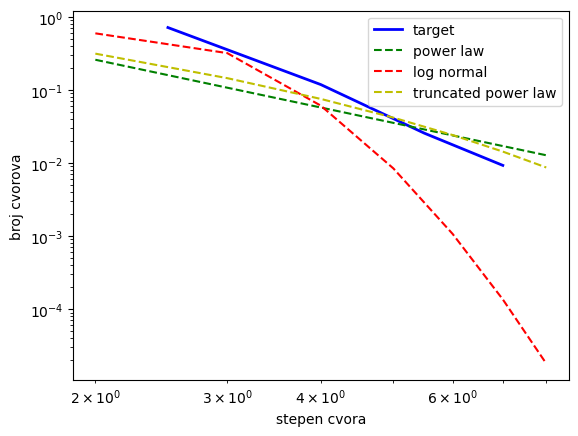

In [10]:
#%pip install powerlaw

import powerlaw
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
results = powerlaw.Fit(degree_sequence)

fit=powerlaw.Fit(degree_sequence,xmin=1)
fig2 = fit.plot_pdf(color='b', linewidth=2, label='target')
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='power law')
fit.lognormal.plot_pdf(color='r', linestyle='--', ax=fig2, label='log normal')
fit.truncated_power_law.plot_pdf(color='y', linestyle='--', ax=fig2, label='truncated power law')
fig2.legend()
plt.xlabel('stepen cvora')
plt.ylabel('broj cvorova')
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

#fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
##fit.plot_pdf( color= 'b')
#plt.figure(figsize=(10, 6))
#fig2 = fit.plot_pdf(color='b', linewidth=2)
#fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
#fit.distribution_compare('power_law', 'lognormal')
##fig4 = fit.plot_ccdf(linewidth=3, color='black')
#fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
#fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
#fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--')


In [877]:
#print(G.edges)
#list_stops = set(dataStops['stop_id'].unique())
output_path = 'models/directed_l_graph.gexf'

nx.write_gexf(G, output_path)
#print(list_stops)

In [6]:

def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [8]:

# ekstrakcija dominantne komponente
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
G2=G.to_undirected()
largest_cc = max(nx.connected_components(G2), key=len)
S = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
Gdom = G2.subgraph(largest_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} čvorova i {len(Gdom.edges())} grana")
#G = Gdom

Dominantna komponenta ima 3116 čvorova i 3833 grana


In [9]:
plot_and_save_dendrogram(Gdom)

KeyboardInterrupt: 

In [265]:
import math
def distance(lat1,lat2,lon1,lon2):
    lat1=lat1*math.pi/180
    lat2=lat2*math.pi/180
    lon1=lon1*math.pi/180
    lon2=lon2*math.pi/180
    t1=math.sin((lat1-lat2)/2)**2
    t2=math.sin((lon1-lon2)/2)**2
    R=6371
    d=2*R*math.asin(math.sqrt(t1+t2*math.cos(lat1)*math.cos(lat2)))
    return d 

In [868]:
def similarity(i,j):
    tip1=G.nodes[i]['tip'] 
    tip2=G.nodes[j]['tip']
    lat1=G.nodes[i]['lat']
    lat2=G.nodes[j]['lat']
    lon1=G.nodes[i]['lon']
    lon2=G.nodes[j]['lon']
    weight=1
    if (G.has_edge(i,j)):
            weight= G.edges[i,j]['weight']
    dist= distance(lat1,lat2,lon1,lon2)
    tipRank=1
   
    if (tip1=='tramvajska' and tip1==tip2):
        tipRank=4
    if (tip2=='trolejbuska' and tip1==tip2):
        tipRank=2
    if (tip1=='mesovita' and (tip1==tip2 or tip2=='tramvajska')):
        tipRank=1.5
   
    if dist < 0.1:
        distRank=10
    elif dist<0.5:
        distRank=8
    elif dist<1:
        distRank=6
    elif dist<1.5:
        distRank=5
    elif dist<2:
        distRank=4
    elif dist<3:
        distRank=3
    elif dist<5:
        distRank=2
    elif dist<10:
        distRank=1.5
    else:
        distRank=1
    #ret=1/dist*math.sqrt(dist)*tipRank*(weight**2)
    #distRank = np.exp(-dist**2/(2))
    ret = distRank*tipRank*weight
    return ret 

In [810]:
import numpy as np

#size = len(G.nodes())
#W = np.zeros((size,size))
#for i, node1 in enumerate(G.nodes()):
#    if (not i%100):
#        print(i)
#    for j, node2 in enumerate(G.nodes()):
#        if (i!=j):
#            W[i][j]=similarity(node1, node2)
#print(W) 


In [869]:
#print(G.edges())
for (x,y) in G.edges():
    G.edges[x,y]['rank']=similarity(x,y)


In [870]:
#Laplasijan matrica
L = nx.laplacian_matrix(G.to_undirected(),weight='rank').toarray()

In [871]:
#pronalazenje sopstevnih vrednosit i sopstvenih vektora
l, v = np.linalg.eig(L)

In [872]:
#v = np.real(v)
#l = np.real(l)
x_axis = np.arange(l.shape[0])+1

sort = np.argsort(l)
l = l[sort]
v = v[:, sort]

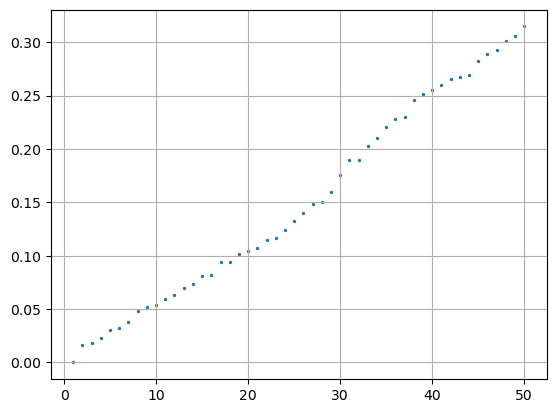

In [874]:
plt.grid('on')
plt.scatter(x_axis[:50], l[:50],s = 2)

In [875]:
k = 29
vk = v[:,:k]

In [876]:
 from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(vk)
nodes= list(G.nodes)
for i in range(len(kmeans.labels_)):
              G.nodes[nodes[i]]['spektralniKlaster']=kmeans.labels_[i]


In [1]:
print(G)

NameError: name 'G' is not defined

In [632]:
#clusters = []
#for i in range(k):
 #   clusters.append(vk[index==i,:])
#clusters = np.array(clusters)

C:\Users\stefa\AppData\Local\Temp\ipykernel_15956\3499124932.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [633]:
#M = np.array([c.mean(axis = 0) for c in clusters])

In [644]:
#def getCluster(elem):
 #   min_dist = 100000
  #  for i, m in enumerate(M):
   #     dist = np.linalg.norm(elem - m)
    #    if min_dist > dist:
     #       min_dist = dist
      #      new_cluster = i
    #return new_cluster

In [649]:
#end = False
#while(not end):
 #   end = True
  #  c_new = np.empty((k,), dtype=list)
   # for i, c in enumerate(clusters):
    #    for e in c:
     #       new_cluster = getCluster(e)
      #      c_new[new_cluster] += [e]
       #     if new_cluster != i:
        #        end = False 
    #clusters = c_new
    #M = np.array([c.mean(axis = 0) for c in clusters])

TypeError: unsupported operand type(s) for +=: 'NoneType' and 'list'